# Read in Data


In [1]:
import pandas as pd
df = pd.read_csv('credit_card_default.csv')

In [2]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
#needs feature engineering

In [4]:
df.drop(['ID'], axis = 1, inplace = True)

/Users/plam1122/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
# df.describe()
# df.info()

## Create Dataframe to download into SQL for feature engineering

In [6]:
df = df.apply(pd.to_numeric, errors='coerce')


In [7]:
#move table to 
df.to_csv('credit_card_default_sql.csv')

# Engineer Features in SQL

In [8]:
from sqlalchemy import create_engine
import pandas as pd
cnx = create_engine('postgresql://ubuntu@3.134.79.66:5432/credit_card2')

In [9]:
df = pd.read_sql_query('''SELECT * FROM credit_card''', cnx)

### Number of Missed Payments

In [10]:
#error here
df['missed_payments'] = pd.read_sql_query('''
Select id, late1 + late2 + late3 + late4 + late5 + late6 as lates from 
(Select id, 
CASE WHEN pay_amt1 = '0' THEN 1 ELSE 0 END as late1,
CASE WHEN pay_amt2 = '0' THEN 1 ELSE 0 END as late2,
CASE WHEN pay_amt3 = '0' THEN 1 ELSE 0 END as late3,
CASE WHEN pay_amt4 = '0' THEN 1 ELSE 0 END as late4,
CASE WHEN pay_amt5 = '0' THEN 1 ELSE 0 END as late5,
CASE WHEN pay_amt6 = '0' THEN 1 ELSE 0 END as late6
From credit_card) as late
''', cnx)['lates']

In [11]:
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment,missed_payments
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,5
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,2
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,2
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,2
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,0


In [12]:
# + 
# CASE WHEN pay_amt3 = '0' THEN 1 ELSE 0 END
# + 
# CASE WHEN pay_amt4 = '0' THEN 1 ELSE 0 END
# + 
# CASE WHEN pay_amt5 = '0' THEN 1 ELSE 0 END
# + 
# CASE WHEN pay_amt6 = '0' THEN 1 ELSE 0 END

In [13]:
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment', 'missed_payments'],
      dtype='object')

In [14]:
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment,missed_payments
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,5
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,2
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,2
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,2
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,0


### Total Bill Amount

In [15]:
df['Total_Bill_Amt'] = pd.read_sql_query('''Select 
    bill_amt1 + bill_amt2 + bill_amt3 + bill_amt4 + bill_amt5 + bill_amt6 as total_bill
    from

    (select
    cast(bill_amt1 as float),
    cast(bill_amt2 as float),
    cast(bill_amt3 as float),
    cast(bill_amt4 as float),
    cast(bill_amt5 as float),
    cast(bill_amt6 as float)
    from credit_card) as sum'''
    , cnx)['total_bill']

#maybe better ratio is total_pay_amount / max(bill_amt)
#because bill_amt is total bill not new bill

In [16]:
df.iloc[:, 11:]

,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment,missed_payments,Total_Bill_Amt
0,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,5,7704.0
1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,2,17077.0
2,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,101653.0
3,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,231334.0
4,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,109339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0,725349.0
29996,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,2,21182.0
29997,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,2,70496.0
29998,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,0,266611.0


In [17]:
df['id'].value_counts().sort_values(ascending = False)

29945    1
6953     1
6741     1
19708    1
25594    1
        ..
25579    1
27923    1
10826    1
22182    1
12900    1
Name: id, Length: 30000, dtype: int64

### Total Amount Payed

In [18]:
df['Total_Pay_Amt'] = pd.read_sql_query('''Select 
    pay_amt1 + pay_amt2 + pay_amt3 + pay_amt4 + pay_amt5 + pay_amt6 as total_pay
    from

    (select
    cast(pay_amt1 as float),
    cast(pay_amt2 as float),
    cast(pay_amt3 as float),
    cast(pay_amt4 as float),
    cast(pay_amt5 as float),
    cast(pay_amt6 as float)
    from credit_card) as sum'''
    , cnx)['total_pay']

In [19]:


df

#make sex, marraige 0 and 1
#look at education and see if making them all dummy variables makes sense

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment,missed_payments,Total_Bill_Amt,Total_Pay_Amt
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,5,7704.0,689.0
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,2,17077.0,5000.0
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,101653.0,11018.0
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,231334.0,8388.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,0,109339.0,59049.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,8500,20000,5003,3047,5000,1000,0,0,725349.0,42550.0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,1837,3526,8998,129,0,0,0,2,21182.0,14490.0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,0,0,22000,4200,2000,3100,1,2,70496.0,31300.0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,85900,3409,1178,1926,52964,1804,1,0,266611.0,147181.0


### Pay Variance

In [20]:
df['pay_variance'] = pd.read_sql_query(''' Select * From
    (Select 
    GREATEST(cast(pay_amt1 as float), cast(pay_amt2 as float), cast(pay_amt3 as float), 
        cast(pay_amt4 as float), cast(pay_amt5 as float), cast(pay_amt6 as float)) - 
    LEAST(cast(pay_amt1 as float), cast(pay_amt2 as float), cast(pay_amt3 as float), 
        cast(pay_amt4 as float), cast(pay_amt5 as float), cast(pay_amt6 as float)) as var
    From credit_card) as var_table

    ''', cnx)['var']

### Bill Variance

In [21]:
df['bill_variance'] = pd.read_sql_query(''' Select * From
    (Select 
    GREATEST(cast(bill_amt1 as float), cast(bill_amt2 as float), cast(bill_amt3 as float), 
        cast(bill_amt4 as float), cast(bill_amt5 as float), cast(bill_amt6 as float)) - 
    LEAST(cast(bill_amt1 as float), cast(bill_amt2 as float), cast(bill_amt3 as float), 
        cast(bill_amt4 as float), cast(bill_amt5 as float), cast(bill_amt6 as float)) as var
    From credit_card) as var_table

    ''', cnx)['var']

### avg bill 

In [22]:
df['avg_bill_amt'] = pd.read_sql_query('''
    Select (bill_amt1 + bill_amt2 + bill_amt3 + bill_amt4 + bill_amt5 + bill_amt6)/6 as avg
    From
    (Select cast(bill_amt1 as float), cast(bill_amt2 as float), cast(bill_amt3 as float), 
        cast(bill_amt4 as float), cast(bill_amt5 as float), cast(bill_amt6 as float)
    
    FROM credit_card) as bills
''', cnx)['avg']

### Max Bill

In [23]:
df['max_bill'] = pd.read_sql_query('''
Select*From(
Select GREATEST(cast(bill_amt1 as float), cast(bill_amt2 as float), cast(bill_amt3 as float), 
        cast(bill_amt4 as float), cast(bill_amt5 as float), cast(bill_amt6 as float))
        From 
        credit_card) as max
''', cnx)['greatest']

In [24]:
df.iloc[:,11:]
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt5,pay_amt6,default_payment,missed_payments,Total_Bill_Amt,Total_Pay_Amt,pay_variance,bill_variance,avg_bill_amt,max_bill
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,1,5,7704.0,689.0,689.0,3913.0,1284.000000,3913.0
1,2,120000,2,2,2,26,-1,2,0,0,...,0,2000,1,2,17077.0,5000.0,2000.0,1730.0,2846.166667,3455.0
2,3,90000,2,2,2,34,0,0,0,0,...,1000,5000,0,0,101653.0,11018.0,4000.0,15680.0,16942.166667,29239.0
3,4,50000,2,2,1,37,0,0,0,0,...,1069,1000,0,0,231334.0,8388.0,1019.0,20977.0,38555.666667,49291.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,689,679,0,0,109339.0,59049.0,36002.0,30165.0,18223.166667,35835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,5000,1000,0,0,725349.0,42550.0,19000.0,192385.0,120891.500000,208365.0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,0,0,2,21182.0,14490.0,8998.0,8979.0,3530.333333,8979.0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,2000,3100,1,2,70496.0,31300.0,22000.0,18120.0,11749.333333,20878.0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52964,1804,1,0,266611.0,147181.0,84722.0,80024.0,44435.166667,78379.0


In [25]:
# features to create:

#total bill statement to amount payed ratio

#number of 0 pays - done

#ratio: (variance in bill paid/avg_bill_amount)

df['adjusted_pay_variance'] = df['pay_variance']/df['avg_bill_amt']

#ratio: (pay variance / bill variance)

df['pay_bill_var_ratio'] = df['pay_variance']/df['bill_variance']

#ratio: (bill_var / avg_bill)

df['adjusted_bill_var'] = df['bill_variance'] / df['avg_bill_amt']
#max(pay) - min(pay) - done

#avg_bill - done

#max bill

#total paid - done

#max bill amount to credit limit

df['max_bill_to_cred_lim'] = df['max_bill']/df['limit_bal'].astype(float)

#ratio: pay/limit

df['paid_limit_ratio'] = df['Total_Pay_Amt']/df['limit_bal'].astype(float)

In [26]:
df.to_pickle('credit_card_df.pkl')

In [ ]:
# #for flask app
# #['pay_0', 'pay_2', , 'adjusted_bill_var',
# #      'Total_Pay_Amt', 'avg_bill_amt', 'adjusted_pay_variance', 'default_payment', 'age', 'paid_limit_ratio']

# ['max_bill_to_cred_lim'] = max_bill / limit_bal
# ['adjusted_bill_var'] = highest bill - lowest bill / avg bill amount
# ['adjusted_pay_variance'] = highest pay - lowest pay / avg bill amt
# ['paid_limit_ratio'] = total pay amt / limit bal

# need:
# pay0
# pay2
# highest bill
# lowest bill
# limit bal
# avg bill
# highest pay
# lowest pay
# total pay

# See next notebook for EDA / Modeling


### EDA:

Formatting

Deal with NULL values: drop, impute, etc.

Look for outliers

Data viz (pair plots, histograms of distributions, etc.)

Look at class balance

Groupbys for categorical variables

Group by target, look at means/distributions of features

Another round of feature engineering

Check Min/Max/Means for Outliers - df.describe()

Check correlations / multicollinearity

Split trainval-test


## 3. Check Min/Max/Means for Outliers - df.describe()


In [27]:
describe_df = df.describe()
describe_df

,missed_payments,Total_Bill_Amt,Total_Pay_Amt,pay_variance,bill_variance,avg_bill_amt,max_bill,adjusted_pay_variance,pay_bill_var_ratio,adjusted_bill_var,max_bill_to_cred_lim,paid_limit_ratio
count,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,3.000000e+04,2.920500e+04,2.890900e+04,2.913400e+04,30000.000000,30000.000000
mean,1.229900,2.698617e+05,3.165139e+04,1.460458e+04,2.885023e+04,44976.945200,6.057244e+04,inf,inf,inf,0.494965,0.233451
std,1.718588,3.795643e+05,6.082768e+04,3.743662e+04,4.760694e+04,63260.721860,7.840481e+04,NaN,NaN,NaN,0.433046,0.315753
min,0.000000,-3.362590e+05,0.000000e+00,0.000000e+00,0.000000e+00,-56043.166667,-6.029000e+03,-2.676000e+03,0.000000e+00,-2.503714e+03,-0.100000,0.000000
25%,0.000000,2.868800e+04,6.679750e+03,1.500000e+03,4.011000e+03,4781.333333,1.006000e+04,5.289977e-02,1.317452e-01,2.351088e-01,0.070636,0.067714
50%,0.000000,1.263110e+05,1.438300e+04,3.600000e+03,1.159350e+04,21051.833333,3.120850e+04,1.886140e-01,5.641219e-01,8.954604e-01,0.430702,0.156667
75%,2.000000,3.426265e+05,3.350350e+04,1.044600e+04,3.315175e+04,57104.416667,7.959900e+04,1.558960e+00,1.000000e+00,2.063811e+00,0.923246,0.263153
max,6.000000,5.263883e+06,3.764066e+06,1.679893e+06,1.682177e+06,877313.833333,1.664089e+06,inf,inf,inf,10.688575,14.566337


In [28]:
# stocks_df2 = stocks_df2[stocks_df2['Percent Increase']<5*describe_df.loc['75%', 'Percent Increase']]
# stocks_df2

In [29]:
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,Total_Pay_Amt,pay_variance,bill_variance,avg_bill_amt,max_bill,adjusted_pay_variance,pay_bill_var_ratio,adjusted_bill_var,max_bill_to_cred_lim,paid_limit_ratio
0,1,20000,2,2,1,24,2,2,-1,-1,...,689.0,689.0,3913.0,1284.000000,3913.0,0.536604,0.176080,3.047508,0.195650,0.034450
1,2,120000,2,2,2,26,-1,2,0,0,...,5000.0,2000.0,1730.0,2846.166667,3455.0,0.702700,1.156069,0.607835,0.028792,0.041667
2,3,90000,2,2,2,34,0,0,0,0,...,11018.0,4000.0,15680.0,16942.166667,29239.0,0.236097,0.255102,0.925501,0.324878,0.122422
3,4,50000,2,2,1,37,0,0,0,0,...,8388.0,1019.0,20977.0,38555.666667,49291.0,0.026429,0.048577,0.544070,0.985820,0.167760
4,5,50000,1,2,1,57,-1,0,-1,0,...,59049.0,36002.0,30165.0,18223.166667,35835.0,1.975617,1.193502,1.655311,0.716700,1.180980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,42550.0,19000.0,192385.0,120891.500000,208365.0,0.157166,0.098760,1.591386,0.947114,0.193409
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,14490.0,8998.0,8979.0,3530.333333,8979.0,2.548768,1.002116,2.543386,0.059860,0.096600
29997,29998,30000,1,2,2,37,4,3,2,-1,...,31300.0,22000.0,18120.0,11749.333333,20878.0,1.872447,1.214128,1.542215,0.695933,1.043333
29998,29999,80000,1,3,1,41,1,-1,0,0,...,147181.0,84722.0,80024.0,44435.166667,78379.0,1.906643,1.058707,1.800916,0.979738,1.839762


# EDA: Check Distributions of Key Variables

## check correlations

In [30]:
# %%time
# import seaborn as sns
# import matplotlib as pyplot

# sns.pairplot(df)

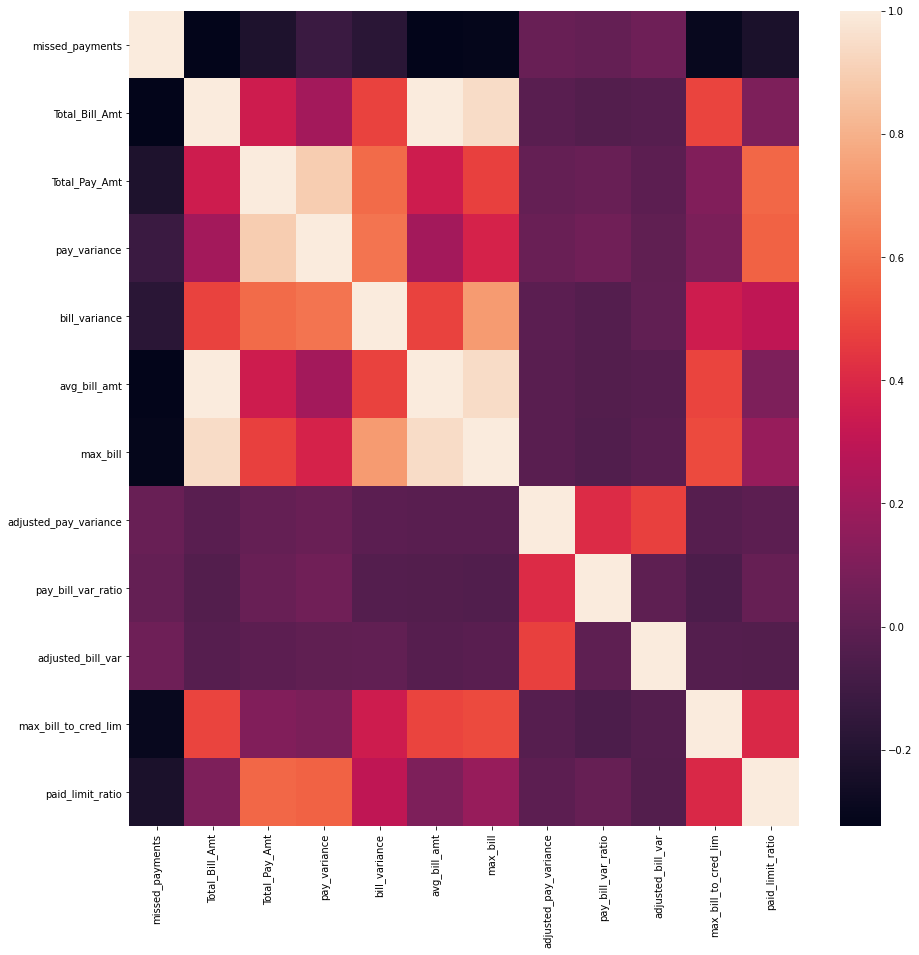

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = [15,15])

sns.heatmap(df.corr())

In [32]:
df.corr()

,missed_payments,Total_Bill_Amt,Total_Pay_Amt,pay_variance,bill_variance,avg_bill_amt,max_bill,adjusted_pay_variance,pay_bill_var_ratio,adjusted_bill_var,max_bill_to_cred_lim,paid_limit_ratio
missed_payments,1.000000,-0.323879,-0.220265,-0.120369,-0.177048,-0.323879,-0.310183,0.028140,0.018255,0.050556,-0.297106,-0.226238
Total_Bill_Amt,-0.323879,1.000000,0.343906,0.213747,0.481619,1.000000,0.943826,-0.018062,-0.037413,-0.027576,0.486812,0.099889
Total_Pay_Amt,-0.220265,0.343906,1.000000,0.894084,0.589675,0.343906,0.472711,0.018319,0.032112,-0.004511,0.107631,0.577978
pay_variance,-0.120369,0.213747,0.894084,1.000000,0.615922,0.213747,0.379230,0.036447,0.056731,0.004424,0.093370,0.561910
bill_variance,-0.177048,0.481619,0.589675,0.615922,1.000000,0.481619,0.725966,-0.008981,-0.030648,0.007343,0.346100,0.301737
avg_bill_amt,-0.323879,1.000000,0.343906,0.213747,0.481619,1.000000,0.943826,-0.018062,-0.037413,-0.027576,0.486812,0.099889
max_bill,-0.310183,0.943826,0.472711,0.379230,0.725966,0.943826,1.000000,-0.016628,-0.040281,-0.016784,0.502583,0.176146
adjusted_pay_variance,0.028140,-0.018062,0.018319,0.036447,-0.008981,-0.018062,-0.016628,1.000000,0.408992,0.472748,-0.028919,-0.008302
pay_bill_var_ratio,0.018255,-0.037413,0.032112,0.056731,-0.030648,-0.037413,-0.040281,0.408992,1.000000,0.000855,-0.058300,0.025231
adjusted_bill_var,0.050556,-0.027576,-0.004511,0.004424,0.007343,-0.027576,-0.016784,0.472748,0.000855,1.000000,-0.031184,-0.035276


All Pays and bill amounts seem to be highly correlated with eachother


## 1. Check Null Values / Data Types + Split Data

In [33]:
#change entire dataframe to numeric values


In [34]:
#check null values
#df.isna().sum()

In [36]:
#df.info()
import numpy as np
df = df.apply(pd.to_numeric, errors='coerce')
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [37]:
df.isnull().sum()
df = df.dropna()

In [38]:
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,Total_Pay_Amt,pay_variance,bill_variance,avg_bill_amt,max_bill,adjusted_pay_variance,pay_bill_var_ratio,adjusted_bill_var,max_bill_to_cred_lim,paid_limit_ratio
0,1,20000,2,2,1,24,2,2,-1,-1,...,689.0,689.0,3913.0,1284.000000,3913.0,0.536604,0.176080,3.047508,0.195650,0.034450
1,2,120000,2,2,2,26,-1,2,0,0,...,5000.0,2000.0,1730.0,2846.166667,3455.0,0.702700,1.156069,0.607835,0.028792,0.041667
2,3,90000,2,2,2,34,0,0,0,0,...,11018.0,4000.0,15680.0,16942.166667,29239.0,0.236097,0.255102,0.925501,0.324878,0.122422
3,4,50000,2,2,1,37,0,0,0,0,...,8388.0,1019.0,20977.0,38555.666667,49291.0,0.026429,0.048577,0.544070,0.985820,0.167760
4,5,50000,1,2,1,57,-1,0,-1,0,...,59049.0,36002.0,30165.0,18223.166667,35835.0,1.975617,1.193502,1.655311,0.716700,1.180980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,42550.0,19000.0,192385.0,120891.500000,208365.0,0.157166,0.098760,1.591386,0.947114,0.193409
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,14490.0,8998.0,8979.0,3530.333333,8979.0,2.548768,1.002116,2.543386,0.059860,0.096600
29997,29998,30000,1,2,2,37,4,3,2,-1,...,31300.0,22000.0,18120.0,11749.333333,20878.0,1.872447,1.214128,1.542215,0.695933,1.043333
29998,29999,80000,1,3,1,41,1,-1,0,0,...,147181.0,84722.0,80024.0,44435.166667,78379.0,1.906643,1.058707,1.800916,0.979738,1.839762


In [39]:
from sklearn.model_selection import train_test_split
X = df.drop(['default_payment', 'id', 'Total_Pay_Amt'], axis = 1)
y = df['default_payment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)

In [40]:
X.isnull().sum()

limit_bal                0
sex                      0
education                0
marriage                 0
age                      0
pay_0                    0
pay_2                    0
pay_3                    0
pay_4                    0
pay_5                    0
pay_6                    0
bill_amt1                0
bill_amt2                0
bill_amt3                0
bill_amt4                0
bill_amt5                0
bill_amt6                0
pay_amt1                 0
pay_amt2                 0
pay_amt3                 0
pay_amt4                 0
pay_amt5                 0
pay_amt6                 0
missed_payments          0
Total_Bill_Amt           0
pay_variance             0
bill_variance            0
avg_bill_amt             0
max_bill                 0
adjusted_pay_variance    0
pay_bill_var_ratio       0
adjusted_bill_var        0
max_bill_to_cred_lim     0
paid_limit_ratio         0
dtype: int64

In [41]:
#scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_tr = scaler.fit_transform(X_train)
X_te = scaler.transform(X_test)

## 2. balance class sample


In [42]:
import numpy as np
#balance class sample

#check Y Variable

y.value_counts()[1]/np.sum(y.value_counts())


0.21370224894852097

Credit Card Fraud constitutes ~ 22% of the Data

In [43]:
#!conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score


import imblearn.over_sampling

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 2, 0 : n_neg}

ROS = RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_sample(X_tr, y_train)

lr = LogisticRegression(solver='liblinear') 
lr.fit(X_tr, y_train)

print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr.predict(X_te)), roc_auc_score(y_test, lr.predict_proba(X_te)[:,1]))) 

lr_os = LogisticRegression(solver='liblinear') 
lr_os.fit(X_tr_rs, y_tr_rs)

print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_os.predict(X_te)), roc_auc_score(y_test, lr_os.predict_proba(X_te)[:,1])))

Simple Logistic Regression; Test F1: 0.388, Test AUC: 0.733
Logistic Regression on Oversampled Train Data; Test F1: 0.512, Test AUC: 0.732


In [44]:
## Here are some possible models to use, but feel free to import whichever ones you like
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

X_tr = scaler.fit_transform(X_tr_rs)
X_te = scaler.transform(X_test)

accuracy_d = dict()
precision_d = dict()
recall_d = dict()
f1_d = dict()
roc_auc = dict()
for algorithm in [KNeighborsClassifier(n_neighbors=10),LogisticRegression(),GaussianNB(), RandomForestClassifier()]:
    algorithm.fit(X_tr, y_tr_rs)
    y_pred = algorithm.predict(X_te)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    accuracy_d[alg_label] = accuracy_score(y_test, y_pred)
    precision_d[alg_label] = precision_score(y_test, y_pred)
    recall_d[alg_label] = recall_score(y_test, y_pred)
    f1_d[alg_label] = f1_score(y_test, y_pred)
    roc_auc[alg_label] = roc_auc_score(y_test, algorithm.predict_proba(X_te)[:,1])
    print(alg_label, '-'*10, '\n', classification_report(y_test, y_pred))

print('accuracy ', accuracy_d)
print('precision ', precision_d)
print('recall ', recall_d)

KNeighborsClassifier ---------- 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4561
           1       0.25      0.00      0.00      1193

    accuracy                           0.79      5754
   macro avg       0.52      0.50      0.44      5754
weighted avg       0.68      0.79      0.70      5754

LogisticRegression ---------- 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      4561
           1       0.26      0.05      0.09      1193

    accuracy                           0.77      5754
   macro avg       0.53      0.51      0.48      5754
weighted avg       0.68      0.77      0.71      5754

GaussianNB ---------- 
               precision    recall  f1-score   support

           0       0.83      0.67      0.74      4561
           1       0.28      0.49      0.36      1193

    accuracy                           0.63      5754
   macro avg       0.56      0.58     